Przedstawienie dla danych faktycznych (Polska i Szwecja)

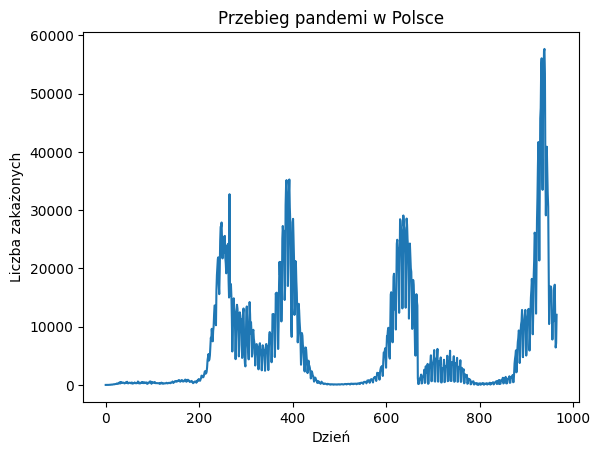

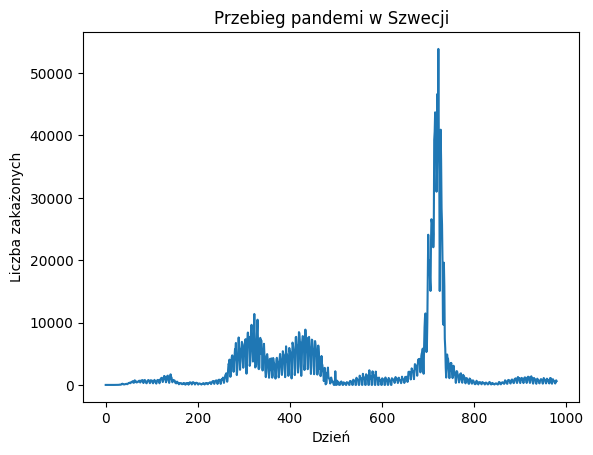

In [ ]:
from pandas.io.excel import read_excel
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z ramki danych
data_poland = read_excel('data.xlsx', sheet_name='Polska_chronologicznie')
data_sweden = read_excel('data.xlsx', sheet_name='Szwecja_chronologicznie')

df_pl = pd.DataFrame(data_poland)
df_se = pd.DataFrame(data_sweden)

df_pl_500 = df_pl.head(500)
df_se_500 = df_se.head(500)

plt.plot(df_pl['cases'])
plt.xlabel('Dzień')
plt.ylabel('Liczba zakażonych')
plt.title('Przebieg pandemi w Polsce')
plt.show()

plt.plot(df_se['cases'])
plt.xlabel('Dzień')
plt.ylabel('Liczba zakażonych')
plt.title('Przebieg pandemi w Szwecji')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def sis_model(beta, gamma, num_days, initial_infected, population):
    # Inicjalizacja zmiennych
    population = population
    infected = initial_infected
    suspected = population - infected

    sus = []
    inf = []

    # Symulacja
    for day in range(0, num_days):

      new_infected = beta * suspected * infected / population
      recovered = gamma * infected

      suspected = suspected - new_infected + recovered
      infected = infected + new_infected - recovered

      sus.append(suspected)
      inf.append(infected)

    plt.plot(range(num_days), inf)
    plt.plot(range(num_days), sus)
    plt.xlabel('Dzień')
    plt.ylabel('Liczba osób')
    plt.title('Model pandemii SIS')
    plt.show()
    return


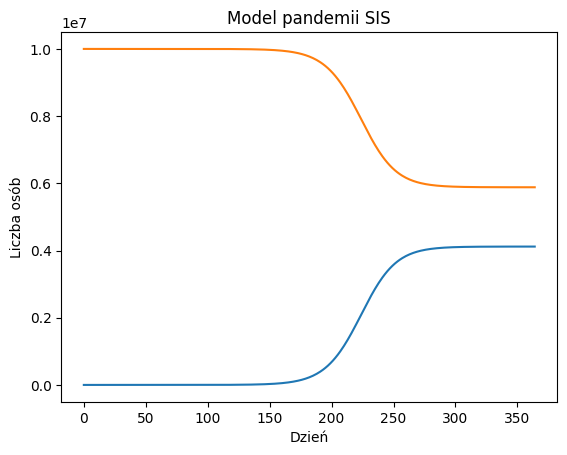

In [ ]:
# Brak izolacji chorych
sis_model(beta=0.17, gamma=0.1, num_days=365, initial_infected=1, population=10_000_000)

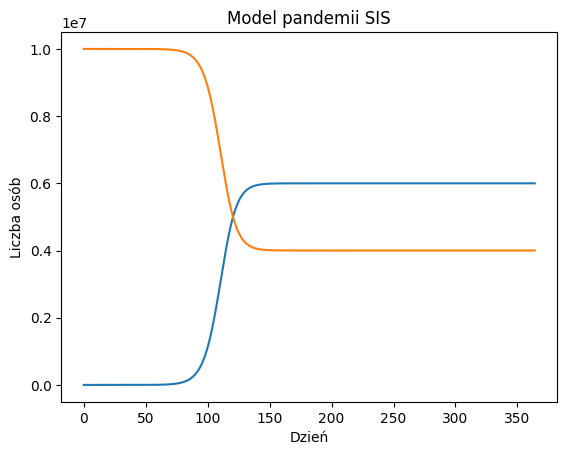

In [ ]:
# Liczba zarazonych większa niż podatnych (beta > 2 x gamma)
sis_model(beta=0.25, gamma=0.1, num_days=365, initial_infected=1, population=10_000_000)

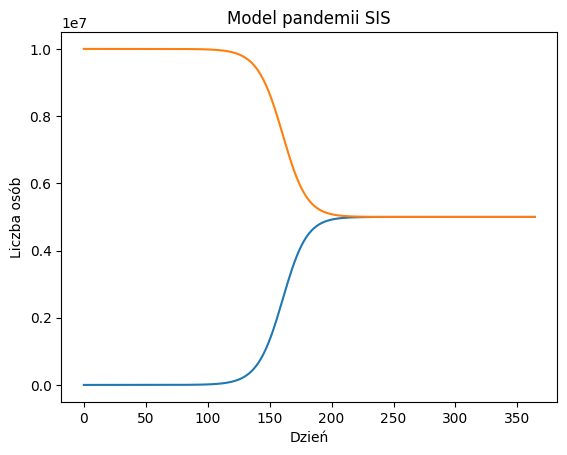

In [ ]:
# Stale zarażona połowa populacji (beta = 2 x gamma)
sis_model(beta=0.2, gamma=0.1, num_days=365, initial_infected=1, population=10_000_000)

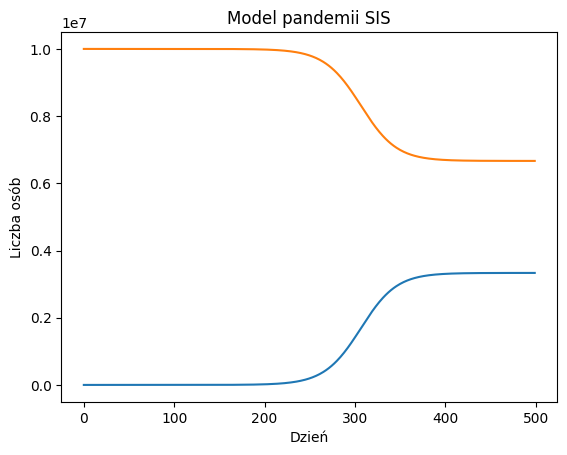

In [ ]:
# Liczba zarazonych mniejsza niż podatnych ( gamma < beta < 2 x gamma)
sis_model(beta=0.15, gamma=0.1, num_days=500, initial_infected=1, population=10_000_000)

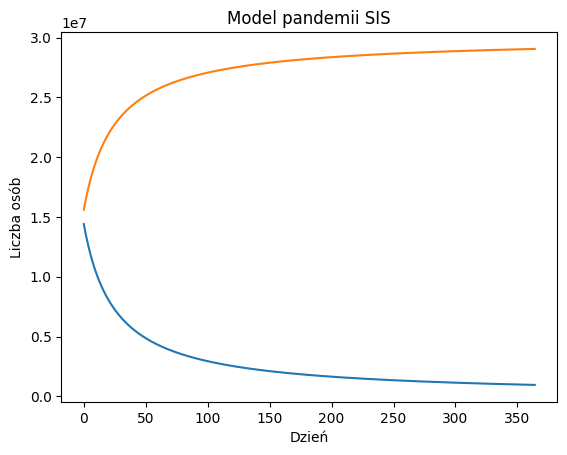

In [ ]:
# Wygaśnięcie pandemii (beta =< gamma)
sis_model(beta=0.08, gamma=0.08, num_days=365, initial_infected=15_000_000, population=30_000_000)